Configure path envirorment

In [1]:
import sys
import os
sys.path.append(os.getcwd()[:-4])

Import Libraries

In [8]:
import numpy as np
from examples.traveling_salesman import TravelingSalesman
from src.crossover.order_crossover import OrderCrossover
from src.mutation.position_mutation import PositionMutation
from src.selection.tournament_selection import TournamentSelection

import matplotlib.pyplot as plt
plt.style.use('ggplot')

Defining Distance Matrix 

Cities | A | B | C | D | E
------- | -------- | -------- | -------- | -------- | --------
A | 0 | 2 | 4 | 6 | 8
B | 2 | 0 | 3 | 5 | 7
C | 4 | 3 | 0 | 4 | 6
D | 6 | 5 | 4 | 0 | 2
E | 8 | 7 | 6 | 2 | 0

In [14]:
n_cities = 5
distance_matrix = np.array([
    np.array([0, 2, 4, 6, 8]),
    np.array([2, 0, 3, 5, 7]),
    np.array([4, 3, 0, 4, 6]),
    np.array([6, 5, 4, 0, 2]),
    np.array([8, 7, 6, 2, 0]),
])

Creating the genetic algorithm model

In [30]:
model = TravelingSalesman(
    n_individuals = 6,
    n_genes = n_cities,
    otimizer = np.argmin,  # Minimize the function
    distance_matrix = distance_matrix
)

model.set_selection(TournamentSelection())
model.set_crossover(OrderCrossover())
model.set_mutation(PositionMutation())


Running the Optimization

In [31]:
best_individual = model.simulate()
print('Individual:', best_individual)
print('Best result:', model.fitness([best_individual])[0])

Individual: [0 2 3 4 1]
Best result: 19.0


Visualizing the Fitness Evolution

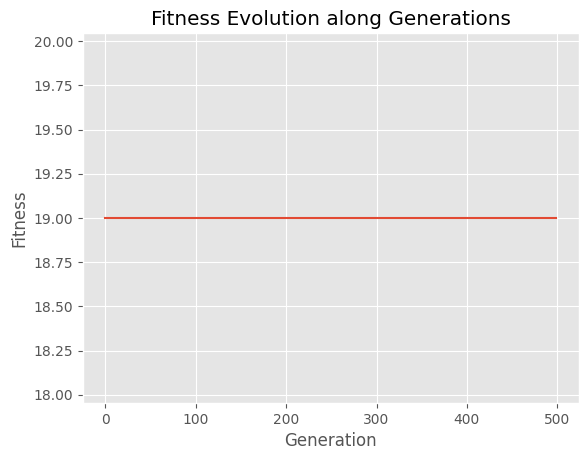

In [32]:
fitness_evolution = [min(model.fitness(generation)) for generation in model.history_individuals]
plt.plot(fitness_evolution)
plt.title('Fitness Evolution along Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()